In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
bos = pd.read_csv('/content/housing.csv')
bos.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bos = pd.read_csv('/content/housing.csv', header=None, delimiter=r'\s+', names=column_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
bos.shape

(506, 14)

In [11]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
bos.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
bos.size

7084

In [14]:
bos.duplicated().sum()

0

In [15]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

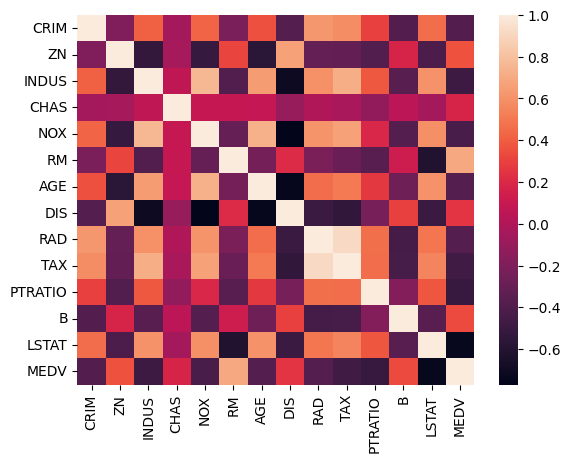

In [37]:
sns.heatmap(bos.corr())

<Axes: xlabel='CHAS', ylabel='MEDV'>

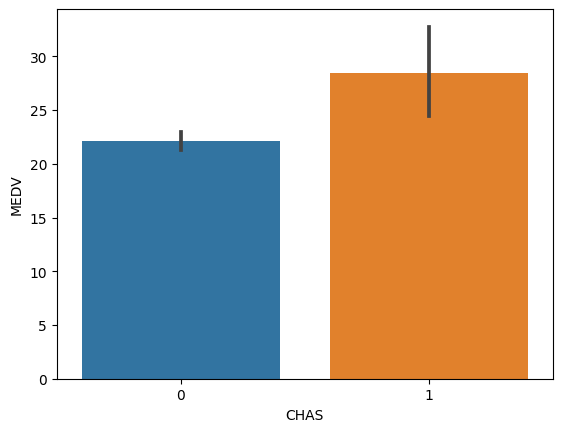

In [17]:
sns.barplot(x='CHAS', y='MEDV', data=bos)

In [18]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


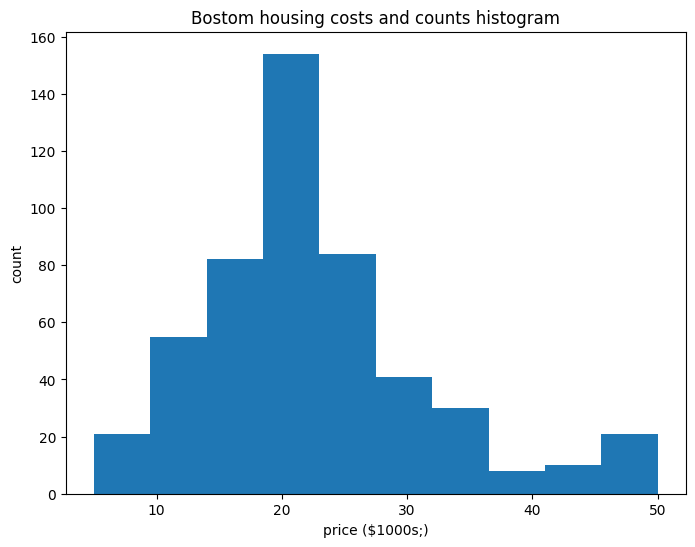

In [23]:
plt.figure(figsize=(8, 6));
plt.hist(bos['MEDV']);
plt.title('Bostom housing costs and counts histogram');
plt.xlabel('price ($1000s;)');
plt.ylabel('count');
plt.show()

<Figure size 800x600 with 0 Axes>

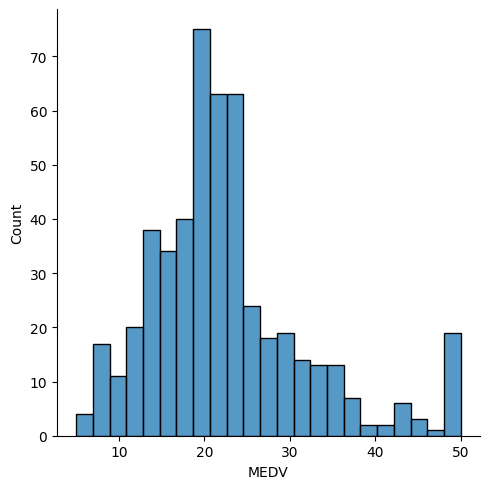

In [24]:
plt.figure(figsize=(8,6));
sns.displot(bos['MEDV']);

In [19]:
X = bos.drop('MEDV', axis=1)


In [20]:
y = bos['MEDV']

In [21]:
stds = StandardScaler()


In [22]:
X = stds.fit_transform(X)

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [26]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [38]:
## Ml algorithms


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

def grid_search(estimator, id, param_grid):
  grid = GridSearchCV(
      estimator = estimator,
      param_grid = param_grid,
      scoring = {'mse':'neg_mean_squared_error', 'accuracy':'accuracy'},
      refit = 'accuracy',
      cv = 5
  )

  grid.fit(X_train, y_train)

  print(f"{id} BEST ESTIMATOR: {grid.best_estimator_}")
  print(f"{id} BEST PARAMETERS: {grid.best_params_}")
  print(f"{id} BEST SCORE (MSE): {grid.best_score_}")

  y_preds = grid.predict(X_test)
  mse = metrics.mean_squared_error(y_test, y_preds)

  print(f"{id} MSE: {mse}")

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr_model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive':[True, False]
}

grid_search(lr_model, "LinearRegression", param_grid)

LinearRegression BEST ESTIMATOR: LinearRegression(positive=True)
LinearRegression BEST PARAMETERS: {'fit_intercept': True, 'positive': True}
LinearRegression BEST SCORE (MSE): nan
LinearRegression MSE: 29.46258107520468


In [36]:
from sklearn.ensemble import RandomForestRegressor

reg_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search(reg_model, "Random Forest", param_grid)

Random Forest BEST ESTIMATOR: RandomForestRegressor()
Random Forest BEST PARAMETERS: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest BEST SCORE (MSE): nan
Random Forest MSE: 8.33233684868421


In [41]:
## using neural networks

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=13, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [45]:
model.compile(optimizer='sgd',
              loss = 'mean_squared_error',
              metrics=['mse'])


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 333 (1.30 KB)
Trainable params: 333 (1.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
## model training

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

cb = EarlyStopping(
    monitor = 'val)loss',
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [50]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=cb)

Epoch 1/100
1/9 [==>...........................] - ETA: 4s - loss: 579.7160 - mse: 579.7160

9/9 [==============================] - 1s 29ms/step - loss: 310.6983 - mse: 310.6983 - val_loss: 147.1969 - val_mse: 147.1969
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 210.8170 - mse: 210.8170

9/9 [==============================] - 0s 8ms/step - loss: 178.2441 - mse: 178.2441 - val_loss: 36.3295 - val_mse: 36.3295
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 22.5393 - mse: 22.5393

9/9 [==============================] - 0s 9ms/step - loss: 138.7563 - mse: 138.7563 - val_loss: 98.8861 - val_mse: 98.8861
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 85.7569 - mse: 85.7569

9/9 [==============================] - 0s 8ms/step - loss: 79.4476 - mse: 79.4476 - val_loss: 39.7252 - val_mse: 39.7252
Epoch 5/100
1/9 [==>...........................] - ETA: 0s - loss: 57.8745 - mse: 57.8745

9/9 [==============================] - 0s 7ms/step - loss: 67.5253 - mse: 67.5253 - val_loss: 101.7239 - val_mse: 101.7239
Epoch 6/100
1/9 [==>...........................] - ETA: 0s - loss: 235.6377 - mse: 235.6377

9/9 [==============================] - 0s 6ms/step - loss: 85.9600 - mse: 85.9600 - val_loss: 25.6791 - val_mse: 25.6791
Epoch 7/100
1/9 [==>...........................] - ETA: 0s - loss: 30.1035 - mse: 30.1035

9/9 [==============================] - 0s 8ms/step - loss: 34.2900 - mse: 34.2900 - val_loss: 58.2345 - val_mse: 58.2345
Epoch 8/100
1/9 [==>...........................] - ETA: 0s - loss: 39.1486 - mse: 39.1486

9/9 [==============================] - 0s 8ms/step - loss: 35.7683 - mse: 35.7683 - val_loss: 32.5250 - val_mse: 32.5250
Epoch 9/100
1/9 [==>...........................] - ETA: 0s - loss: 12.8197 - mse: 12.8197

9/9 [==============================] - 0s 8ms/step - loss: 30.6199 - mse: 30.6199 - val_loss: 39.0342 - val_mse: 39.0342
Epoch 10/100
1/9 [==>...........................] - ETA: 0s - loss: 32.6379 - mse: 32.6379

9/9 [==============================] - 0s 7ms/step - loss: 28.5902 - mse: 28.5902 - val_loss: 19.6260 - val_mse: 19.6260
Epoch 11/100
1/9 [==>...........................] - ETA: 0s - loss: 17.6624 - mse: 17.6624

9/9 [==============================] - 0s 8ms/step - loss: 25.7413 - mse: 25.7413 - val_loss: 26.8167 - val_mse: 26.8167
Epoch 12/100
1/9 [==>...........................] - ETA: 0s - loss: 16.3959 - mse: 16.3959

9/9 [==============================] - 0s 7ms/step - loss: 16.5257 - mse: 16.5257 - val_loss: 23.3672 - val_mse: 23.3672
Epoch 13/100
1/9 [==>...........................] - ETA: 0s - loss: 18.3622 - mse: 18.3622

9/9 [==============================] - 0s 9ms/step - loss: 26.6118 - mse: 26.6118 - val_loss: 44.9505 - val_mse: 44.9505
Epoch 14/100
1/9 [==>...........................] - ETA: 0s - loss: 61.7515 - mse: 61.7515

9/9 [==============================] - 0s 7ms/step - loss: 24.7983 - mse: 24.7983 - val_loss: 19.7896 - val_mse: 19.7896
Epoch 15/100
1/9 [==>...........................] - ETA: 0s - loss: 10.8160 - mse: 10.8160

9/9 [==============================] - 0s 8ms/step - loss: 13.8033 - mse: 13.8033 - val_loss: 17.2978 - val_mse: 17.2978
Epoch 16/100
1/9 [==>...........................] - ETA: 0s - loss: 11.0334 - mse: 11.0334

9/9 [==============================] - 0s 7ms/step - loss: 19.4812 - mse: 19.4812 - val_loss: 16.9652 - val_mse: 16.9652
Epoch 17/100
1/9 [==>...........................] - ETA: 0s - loss: 14.2716 - mse: 14.2716

9/9 [==============================] - 0s 7ms/step - loss: 11.9070 - mse: 11.9070 - val_loss: 16.3832 - val_mse: 16.3832
Epoch 18/100
1/9 [==>...........................] - ETA: 0s - loss: 10.8990 - mse: 10.8990

9/9 [==============================] - 0s 8ms/step - loss: 19.0768 - mse: 19.0768 - val_loss: 16.1829 - val_mse: 16.1829
Epoch 19/100
1/9 [==>...........................] - ETA: 0s - loss: 11.5986 - mse: 11.5986

9/9 [==============================] - 0s 10ms/step - loss: 12.2220 - mse: 12.2220 - val_loss: 14.4167 - val_mse: 14.4167
Epoch 20/100
1/9 [==>...........................] - ETA: 0s - loss: 14.5456 - mse: 14.5456

9/9 [==============================] - 0s 7ms/step - loss: 16.2638 - mse: 16.2638 - val_loss: 43.0405 - val_mse: 43.0405
Epoch 21/100
1/9 [==>...........................] - ETA: 0s - loss: 54.4590 - mse: 54.4590

9/9 [==============================] - 0s 8ms/step - loss: 20.7768 - mse: 20.7768 - val_loss: 22.3212 - val_mse: 22.3212
Epoch 22/100
1/9 [==>...........................] - ETA: 0s - loss: 11.9462 - mse: 11.9462

9/9 [==============================] - 0s 7ms/step - loss: 15.8380 - mse: 15.8380 - val_loss: 16.4973 - val_mse: 16.4973
Epoch 23/100
1/9 [==>...........................] - ETA: 0s - loss: 12.0218 - mse: 12.0218

9/9 [==============================] - 0s 7ms/step - loss: 16.4259 - mse: 16.4259 - val_loss: 13.3181 - val_mse: 13.3181
Epoch 24/100
1/9 [==>...........................] - ETA: 0s - loss: 10.6561 - mse: 10.6561

9/9 [==============================] - 0s 8ms/step - loss: 11.5942 - mse: 11.5942 - val_loss: 14.8029 - val_mse: 14.8029
Epoch 25/100
1/9 [==>...........................] - ETA: 0s - loss: 15.8163 - mse: 15.8163

9/9 [==============================] - 0s 9ms/step - loss: 12.5992 - mse: 12.5992 - val_loss: 19.9232 - val_mse: 19.9232
Epoch 26/100
1/9 [==>...........................] - ETA: 0s - loss: 23.6929 - mse: 23.6929

9/9 [==============================] - 0s 8ms/step - loss: 22.7622 - mse: 22.7622 - val_loss: 15.1427 - val_mse: 15.1427
Epoch 27/100
1/9 [==>...........................] - ETA: 0s - loss: 8.3626 - mse: 8.3626

9/9 [==============================] - 0s 9ms/step - loss: 9.1980 - mse: 9.1980 - val_loss: 16.9007 - val_mse: 16.9007
Epoch 28/100
1/9 [==>...........................] - ETA: 0s - loss: 13.2214 - mse: 13.2214

9/9 [==============================] - 0s 7ms/step - loss: 8.3952 - mse: 8.3952 - val_loss: 15.7276 - val_mse: 15.7276
Epoch 29/100
1/9 [==>...........................] - ETA: 0s - loss: 4.1079 - mse: 4.1079

9/9 [==============================] - 0s 9ms/step - loss: 7.9508 - mse: 7.9508 - val_loss: 14.7739 - val_mse: 14.7739
Epoch 30/100
1/9 [==>...........................] - ETA: 0s - loss: 4.3720 - mse: 4.3720

9/9 [==============================] - 0s 9ms/step - loss: 7.9545 - mse: 7.9545 - val_loss: 20.5961 - val_mse: 20.5961
Epoch 31/100
1/9 [==>...........................] - ETA: 0s - loss: 22.2376 - mse: 22.2376

9/9 [==============================] - 0s 9ms/step - loss: 13.2587 - mse: 13.2587 - val_loss: 13.0903 - val_mse: 13.0903
Epoch 32/100
1/9 [==>...........................] - ETA: 0s - loss: 6.5764 - mse: 6.5764

9/9 [==============================] - 0s 8ms/step - loss: 6.9999 - mse: 6.9999 - val_loss: 14.3013 - val_mse: 14.3013
Epoch 33/100
1/9 [==>...........................] - ETA: 0s - loss: 5.8806 - mse: 5.8806

9/9 [==============================] - 0s 9ms/step - loss: 8.7760 - mse: 8.7760 - val_loss: 14.5403 - val_mse: 14.5403
Epoch 34/100
1/9 [==>...........................] - ETA: 0s - loss: 20.2498 - mse: 20.2498

9/9 [==============================] - 0s 9ms/step - loss: 13.8764 - mse: 13.8764 - val_loss: 17.1008 - val_mse: 17.1008
Epoch 35/100
1/9 [==>...........................] - ETA: 0s - loss: 9.4890 - mse: 9.4890

9/9 [==============================] - 0s 9ms/step - loss: 8.9197 - mse: 8.9197 - val_loss: 13.6194 - val_mse: 13.6194
Epoch 36/100
1/9 [==>...........................] - ETA: 0s - loss: 7.6589 - mse: 7.6589

9/9 [==============================] - 0s 7ms/step - loss: 6.7246 - mse: 6.7246 - val_loss: 23.7775 - val_mse: 23.7775
Epoch 37/100
1/9 [==>...........................] - ETA: 0s - loss: 10.1055 - mse: 10.1055

9/9 [==============================] - 0s 7ms/step - loss: 12.0722 - mse: 12.0722 - val_loss: 15.1873 - val_mse: 15.1873
Epoch 38/100
1/9 [==>...........................] - ETA: 0s - loss: 6.1236 - mse: 6.1236

9/9 [==============================] - 0s 9ms/step - loss: 20.8484 - mse: 20.8484 - val_loss: 13.7538 - val_mse: 13.7538
Epoch 39/100
1/9 [==>...........................] - ETA: 0s - loss: 13.3223 - mse: 13.3223

9/9 [==============================] - 0s 9ms/step - loss: 7.2593 - mse: 7.2593 - val_loss: 12.9364 - val_mse: 12.9364
Epoch 40/100
1/9 [==>...........................] - ETA: 0s - loss: 4.9777 - mse: 4.9777

9/9 [==============================] - 0s 9ms/step - loss: 8.0773 - mse: 8.0773 - val_loss: 14.2783 - val_mse: 14.2783
Epoch 41/100
1/9 [==>...........................] - ETA: 0s - loss: 4.2104 - mse: 4.2104

9/9 [==============================] - 0s 7ms/step - loss: 7.9694 - mse: 7.9694 - val_loss: 17.3794 - val_mse: 17.3794
Epoch 42/100
1/9 [==>...........................] - ETA: 0s - loss: 7.1342 - mse: 7.1342

9/9 [==============================] - 0s 8ms/step - loss: 8.8352 - mse: 8.8352 - val_loss: 13.9880 - val_mse: 13.9880
Epoch 43/100
1/9 [==>...........................] - ETA: 0s - loss: 8.3679 - mse: 8.3679

9/9 [==============================] - 0s 8ms/step - loss: 8.1223 - mse: 8.1223 - val_loss: 14.4123 - val_mse: 14.4123
Epoch 44/100
1/9 [==>...........................] - ETA: 0s - loss: 6.2038 - mse: 6.2038

9/9 [==============================] - 0s 6ms/step - loss: 9.5317 - mse: 9.5317 - val_loss: 15.2239 - val_mse: 15.2239
Epoch 45/100
1/9 [==>...........................] - ETA: 0s - loss: 9.2038 - mse: 9.2038

9/9 [==============================] - 0s 9ms/step - loss: 8.3523 - mse: 8.3523 - val_loss: 11.9324 - val_mse: 11.9324
Epoch 46/100
1/9 [==>...........................] - ETA: 0s - loss: 3.9849 - mse: 3.9849

9/9 [==============================] - 0s 6ms/step - loss: 6.1917 - mse: 6.1917 - val_loss: 14.3934 - val_mse: 14.3934
Epoch 47/100
1/9 [==>...........................] - ETA: 0s - loss: 6.1254 - mse: 6.1254

9/9 [==============================] - 0s 9ms/step - loss: 6.1711 - mse: 6.1711 - val_loss: 15.4679 - val_mse: 15.4679
Epoch 48/100
1/9 [==>...........................] - ETA: 0s - loss: 8.6383 - mse: 8.6383

9/9 [==============================] - 0s 8ms/step - loss: 8.6763 - mse: 8.6763 - val_loss: 13.4702 - val_mse: 13.4702
Epoch 49/100
1/9 [==>...........................] - ETA: 0s - loss: 7.4324 - mse: 7.4324

9/9 [==============================] - 0s 6ms/step - loss: 9.8468 - mse: 9.8468 - val_loss: 14.7634 - val_mse: 14.7634
Epoch 50/100
1/9 [==>...........................] - ETA: 0s - loss: 9.5439 - mse: 9.5439

9/9 [==============================] - 0s 6ms/step - loss: 7.4487 - mse: 7.4487 - val_loss: 15.7801 - val_mse: 15.7801
Epoch 51/100
1/9 [==>...........................] - ETA: 0s - loss: 7.8138 - mse: 7.8138

9/9 [==============================] - 0s 8ms/step - loss: 8.2487 - mse: 8.2487 - val_loss: 16.0005 - val_mse: 16.0005
Epoch 52/100
1/9 [==>...........................] - ETA: 0s - loss: 7.0574 - mse: 7.0574

9/9 [==============================] - 0s 7ms/step - loss: 6.0727 - mse: 6.0727 - val_loss: 13.6075 - val_mse: 13.6075
Epoch 53/100
1/9 [==>...........................] - ETA: 0s - loss: 4.4321 - mse: 4.4321

9/9 [==============================] - 0s 6ms/step - loss: 5.3881 - mse: 5.3881 - val_loss: 14.2473 - val_mse: 14.2473
Epoch 54/100
1/9 [==>...........................] - ETA: 0s - loss: 5.1540 - mse: 5.1540

9/9 [==============================] - 0s 7ms/step - loss: 5.2909 - mse: 5.2909 - val_loss: 12.9965 - val_mse: 12.9965
Epoch 55/100
1/9 [==>...........................] - ETA: 0s - loss: 4.5044 - mse: 4.5044

9/9 [==============================] - 0s 7ms/step - loss: 6.3514 - mse: 6.3514 - val_loss: 12.1792 - val_mse: 12.1792
Epoch 56/100
1/9 [==>...........................] - ETA: 0s - loss: 3.1551 - mse: 3.1551

9/9 [==============================] - 0s 7ms/step - loss: 14.5210 - mse: 14.5210 - val_loss: 14.3807 - val_mse: 14.3807
Epoch 57/100
1/9 [==>...........................] - ETA: 0s - loss: 6.9502 - mse: 6.9502

9/9 [==============================] - 0s 9ms/step - loss: 10.8741 - mse: 10.8741 - val_loss: 19.5668 - val_mse: 19.5668
Epoch 58/100
1/9 [==>...........................] - ETA: 0s - loss: 11.0604 - mse: 11.0604

9/9 [==============================] - 0s 7ms/step - loss: 8.7938 - mse: 8.7938 - val_loss: 12.1834 - val_mse: 12.1834
Epoch 59/100
1/9 [==>...........................] - ETA: 0s - loss: 6.6197 - mse: 6.6197

9/9 [==============================] - 0s 8ms/step - loss: 5.9829 - mse: 5.9829 - val_loss: 13.7447 - val_mse: 13.7447
Epoch 60/100
1/9 [==>...........................] - ETA: 0s - loss: 3.8546 - mse: 3.8546

9/9 [==============================] - 0s 7ms/step - loss: 5.3089 - mse: 5.3089 - val_loss: 14.2188 - val_mse: 14.2188
Epoch 61/100
1/9 [==>...........................] - ETA: 0s - loss: 5.8348 - mse: 5.8348

9/9 [==============================] - 0s 7ms/step - loss: 8.7296 - mse: 8.7296 - val_loss: 16.1107 - val_mse: 16.1107
Epoch 62/100
1/9 [==>...........................] - ETA: 0s - loss: 15.1746 - mse: 15.1746

9/9 [==============================] - 0s 7ms/step - loss: 6.0206 - mse: 6.0206 - val_loss: 13.1972 - val_mse: 13.1972
Epoch 63/100
1/9 [==>...........................] - ETA: 0s - loss: 3.6488 - mse: 3.6488

9/9 [==============================] - 0s 8ms/step - loss: 6.4823 - mse: 6.4823 - val_loss: 14.7604 - val_mse: 14.7604
Epoch 64/100
1/9 [==>...........................] - ETA: 0s - loss: 5.1504 - mse: 5.1504

9/9 [==============================] - 0s 8ms/step - loss: 5.8255 - mse: 5.8255 - val_loss: 15.2186 - val_mse: 15.2186
Epoch 65/100
1/9 [==>...........................] - ETA: 0s - loss: 3.4794 - mse: 3.4794

9/9 [==============================] - 0s 7ms/step - loss: 4.7879 - mse: 4.7879 - val_loss: 11.9938 - val_mse: 11.9938
Epoch 66/100
1/9 [==>...........................] - ETA: 0s - loss: 4.8514 - mse: 4.8514

9/9 [==============================] - 0s 6ms/step - loss: 5.3272 - mse: 5.3272 - val_loss: 12.0883 - val_mse: 12.0883
Epoch 67/100
1/9 [==>...........................] - ETA: 0s - loss: 6.0507 - mse: 6.0507

9/9 [==============================] - 0s 8ms/step - loss: 7.5328 - mse: 7.5328 - val_loss: 12.4780 - val_mse: 12.4780
Epoch 68/100
1/9 [==>...........................] - ETA: 0s - loss: 3.4903 - mse: 3.4903

9/9 [==============================] - 0s 7ms/step - loss: 5.6976 - mse: 5.6976 - val_loss: 12.8164 - val_mse: 12.8164
Epoch 69/100
1/9 [==>...........................] - ETA: 0s - loss: 7.4474 - mse: 7.4474

9/9 [==============================] - 0s 8ms/step - loss: 4.8908 - mse: 4.8908 - val_loss: 12.4298 - val_mse: 12.4298
Epoch 70/100
1/9 [==>...........................] - ETA: 0s - loss: 3.0686 - mse: 3.0686

9/9 [==============================] - 0s 9ms/step - loss: 4.9056 - mse: 4.9056 - val_loss: 13.2704 - val_mse: 13.2704
Epoch 71/100
1/9 [==>...........................] - ETA: 0s - loss: 2.8123 - mse: 2.8123

9/9 [==============================] - 0s 8ms/step - loss: 5.8769 - mse: 5.8769 - val_loss: 15.3315 - val_mse: 15.3315
Epoch 72/100
1/9 [==>...........................] - ETA: 0s - loss: 5.8535 - mse: 5.8535

9/9 [==============================] - 0s 9ms/step - loss: 6.3455 - mse: 6.3455 - val_loss: 17.1206 - val_mse: 17.1206
Epoch 73/100
1/9 [==>...........................] - ETA: 0s - loss: 7.6907 - mse: 7.6907

9/9 [==============================] - 0s 8ms/step - loss: 6.0031 - mse: 6.0031 - val_loss: 15.9772 - val_mse: 15.9772
Epoch 74/100
1/9 [==>...........................] - ETA: 0s - loss: 11.1631 - mse: 11.1631

9/9 [==============================] - 0s 9ms/step - loss: 5.1390 - mse: 5.1390 - val_loss: 12.9780 - val_mse: 12.9780
Epoch 75/100
1/9 [==>...........................] - ETA: 0s - loss: 6.7017 - mse: 6.7017

9/9 [==============================] - 0s 9ms/step - loss: 4.6915 - mse: 4.6915 - val_loss: 12.8708 - val_mse: 12.8708
Epoch 76/100
1/9 [==>...........................] - ETA: 0s - loss: 3.7980 - mse: 3.7980

9/9 [==============================] - 0s 7ms/step - loss: 5.1248 - mse: 5.1248 - val_loss: 12.1988 - val_mse: 12.1988
Epoch 77/100
1/9 [==>...........................] - ETA: 0s - loss: 3.1881 - mse: 3.1881

9/9 [==============================] - 0s 7ms/step - loss: 4.8203 - mse: 4.8203 - val_loss: 15.5600 - val_mse: 15.5600
Epoch 78/100
1/9 [==>...........................] - ETA: 0s - loss: 9.2018 - mse: 9.2018

9/9 [==============================] - 0s 9ms/step - loss: 6.7695 - mse: 6.7695 - val_loss: 12.7209 - val_mse: 12.7209
Epoch 79/100
1/9 [==>...........................] - ETA: 0s - loss: 6.0225 - mse: 6.0225

9/9 [==============================] - 0s 9ms/step - loss: 8.0415 - mse: 8.0415 - val_loss: 13.3145 - val_mse: 13.3145
Epoch 80/100
1/9 [==>...........................] - ETA: 0s - loss: 5.4834 - mse: 5.4834

9/9 [==============================] - 0s 7ms/step - loss: 5.4418 - mse: 5.4418 - val_loss: 13.3893 - val_mse: 13.3893
Epoch 81/100
1/9 [==>...........................] - ETA: 0s - loss: 3.2324 - mse: 3.2324

9/9 [==============================] - 0s 7ms/step - loss: 4.1825 - mse: 4.1825 - val_loss: 13.6752 - val_mse: 13.6752
Epoch 82/100
1/9 [==>...........................] - ETA: 0s - loss: 3.3758 - mse: 3.3758

9/9 [==============================] - 0s 9ms/step - loss: 7.7057 - mse: 7.7057 - val_loss: 13.3548 - val_mse: 13.3548
Epoch 83/100
1/9 [==>...........................] - ETA: 0s - loss: 4.4677 - mse: 4.4677

9/9 [==============================] - 0s 7ms/step - loss: 6.1796 - mse: 6.1796 - val_loss: 12.6918 - val_mse: 12.6918
Epoch 84/100
1/9 [==>...........................] - ETA: 0s - loss: 4.2264 - mse: 4.2264

9/9 [==============================] - 0s 9ms/step - loss: 5.1834 - mse: 5.1834 - val_loss: 13.4793 - val_mse: 13.4793
Epoch 85/100
1/9 [==>...........................] - ETA: 0s - loss: 5.9614 - mse: 5.9614

9/9 [==============================] - 0s 7ms/step - loss: 4.5510 - mse: 4.5510 - val_loss: 13.9593 - val_mse: 13.9593
Epoch 86/100
1/9 [==>...........................] - ETA: 0s - loss: 5.1828 - mse: 5.1828

9/9 [==============================] - 0s 7ms/step - loss: 5.4942 - mse: 5.4942 - val_loss: 17.5294 - val_mse: 17.5294
Epoch 87/100
1/9 [==>...........................] - ETA: 0s - loss: 9.6443 - mse: 9.6443

9/9 [==============================] - 0s 9ms/step - loss: 5.6564 - mse: 5.6564 - val_loss: 12.2155 - val_mse: 12.2155
Epoch 88/100
1/9 [==>...........................] - ETA: 0s - loss: 3.8359 - mse: 3.8359

9/9 [==============================] - 0s 7ms/step - loss: 4.3656 - mse: 4.3656 - val_loss: 13.0825 - val_mse: 13.0825
Epoch 89/100
1/9 [==>...........................] - ETA: 0s - loss: 2.8996 - mse: 2.8996

9/9 [==============================] - 0s 8ms/step - loss: 4.0613 - mse: 4.0613 - val_loss: 12.6261 - val_mse: 12.6261
Epoch 90/100
1/9 [==>...........................] - ETA: 0s - loss: 2.0886 - mse: 2.0886

9/9 [==============================] - 0s 12ms/step - loss: 4.8587 - mse: 4.8587 - val_loss: 13.1981 - val_mse: 13.1981
Epoch 91/100
1/9 [==>...........................] - ETA: 0s - loss: 4.0805 - mse: 4.0805

9/9 [==============================] - 0s 11ms/step - loss: 5.2223 - mse: 5.2223 - val_loss: 13.3808 - val_mse: 13.3808
Epoch 92/100
1/9 [==>...........................] - ETA: 0s - loss: 2.2880 - mse: 2.2880

9/9 [==============================] - 0s 10ms/step - loss: 4.8214 - mse: 4.8214 - val_loss: 13.6757 - val_mse: 13.6757
Epoch 93/100
1/9 [==>...........................] - ETA: 0s - loss: 3.9881 - mse: 3.9881

9/9 [==============================] - 0s 11ms/step - loss: 10.7648 - mse: 10.7648 - val_loss: 16.4856 - val_mse: 16.4856
Epoch 94/100
1/9 [==>...........................] - ETA: 0s - loss: 6.9187 - mse: 6.9187

9/9 [==============================] - 0s 10ms/step - loss: 6.5932 - mse: 6.5932 - val_loss: 15.4599 - val_mse: 15.4599
Epoch 95/100
1/9 [==>...........................] - ETA: 0s - loss: 5.4779 - mse: 5.4779

9/9 [==============================] - 0s 9ms/step - loss: 5.1331 - mse: 5.1331 - val_loss: 12.6683 - val_mse: 12.6683
Epoch 96/100
1/9 [==>...........................] - ETA: 0s - loss: 2.3758 - mse: 2.3758

9/9 [==============================] - 0s 10ms/step - loss: 4.4822 - mse: 4.4822 - val_loss: 13.2154 - val_mse: 13.2154
Epoch 97/100
1/9 [==>...........................] - ETA: 0s - loss: 2.7424 - mse: 2.7424

9/9 [==============================] - 0s 10ms/step - loss: 6.8676 - mse: 6.8676 - val_loss: 13.9305 - val_mse: 13.9305
Epoch 98/100
1/9 [==>...........................] - ETA: 0s - loss: 8.8026 - mse: 8.8026

9/9 [==============================] - 0s 12ms/step - loss: 5.0383 - mse: 5.0383 - val_loss: 18.5155 - val_mse: 18.5155
Epoch 99/100
1/9 [==>...........................] - ETA: 0s - loss: 13.7566 - mse: 13.7566

9/9 [==============================] - 0s 9ms/step - loss: 6.6790 - mse: 6.6790 - val_loss: 14.9066 - val_mse: 14.9066
Epoch 100/100
1/9 [==>...........................] - ETA: 0s - loss: 6.7980 - mse: 6.7980

9/9 [==============================] - 0s 11ms/step - loss: 5.2327 - mse: 5.2327 - val_loss: 12.5305 - val_mse: 12.5305


In [51]:
mse, mae = model.evaluate(X_test, y_test)
print(f"mean squared error is: {mse}")

5/5 [==============================] - 0s 3ms/step - loss: 7.8774 - mse: 7.8774
mean squared error is: 7.87736177444458
